## Machine Learning Lab Assignment - 3

**Author** - Tirth Modi (202201513)

### Question 1
Generate 400 data points in R2 from the uniform distribution U [0,1]. Construct the training set T = { (x11, x21,y1),(x21,x22,y2),......,(x100 1, x100 2,y100)} using the relation

Yi = sin(2 π (xi1^2+ xi2^2)) + εi where εi ~ N(0,0.25).

In the similar way, construct a testing set of size 50 I,e. Test = { (x’11, x’12, y’1),(x’21, x’22 ,y’2),......,(x’50 1, x’50 2, y’50)}.
Estimate the regularized polynomial regression of order 6 with direct method and obtain the 3d plot on test set along with test data points. Find the NMSE, ,RMSE, MAE and R2 .

In [8]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Functions
def uniform_dataset(low,high,size):
  return np.random.uniform(low,high,size)

def normal_dataset(mean,std_dev,size):
  return np.random.normal(mean,std_dev,size)

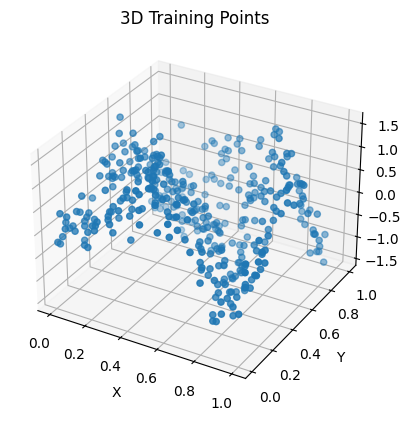

In [9]:
# Training set

x11 = uniform_dataset(0,1,400)
# print(x11)

x12 = uniform_dataset(0,1,400)
# print(x12)

noise = normal_dataset(0,0.25,400)

y1 = []
for i in range(0,400):
  y1.append((np.sin(2*np.pi*(x11[i]**2 + x12[i]**2)) + noise[i]))
# print(y1)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Sample data (replace with your actual data)
X = x11
Y = x12
Z = y1

# Create the surface plot
ax.scatter(X, Y, Z)

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('3D Training Points')

plt.show()

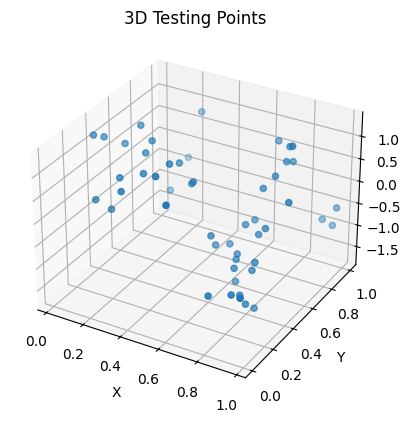

In [10]:
# Testing set

x21 = uniform_dataset(0,1,50)
# print(x21)

x22 = uniform_dataset(0,1,50)
# print(x22)

noise2 = normal_dataset(0,0.25,50)

y2 = []
for i in range(0,50):
  y2.append((np.sin(2*np.pi*(x21[i]**2 + x22[i]**2)) + noise2[i]))
# print(y2)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Sample data (replace with your actual data)
X = x21
Y = x22
Z = y2

# Create the surface plot
ax.scatter(X, Y, Z)

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('3D Testing Points')

plt.show()

In [11]:
# Function to calculate RMSE
def calculate_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Function to calculate NMSE
def calculate_nmse(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    variance = np.var(y_true)
    return mse / variance

# Function to calculate R^2 (Coefficient of Determination)
def calculate_r2(y_true, y_pred):
    ss_res = 0
    ss_tot = 0
    for i in range(len(y_true)):
        ss_res += np.sum((y_true[i] - y_pred[i]) ** 2)
        ss_tot += np.sum((y_true[i] - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

# Function to calculate MAE
def calculate_mae(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)

Matrix A = [[1.00000000e+00 9.06310565e-01 8.21398840e-01 ... 1.16551608e-04
  1.05631954e-04 1.90467958e-05]
 [1.00000000e+00 3.03796522e-01 9.22923268e-02 ... 6.86348836e-03
  2.08510389e-03 2.53427583e-03]
 [1.00000000e+00 6.17599384e-01 3.81429000e-01 ... 6.76778942e-01
  4.17978258e-01 6.25945043e-01]
 ...
 [1.00000000e+00 6.11039741e-01 3.73369565e-01 ... 6.56483205e-01
  4.01137328e-01 6.03487590e-01]
 [1.00000000e+00 2.88827256e-01 8.34211836e-02 ... 7.48292652e-02
  2.16127313e-02 4.45539052e-02]
 [1.00000000e+00 8.73745020e-01 7.63430359e-01 ... 8.38205324e-01
  7.32377727e-01 8.09134088e-01]]
beta_0 = -0.5847945914801005 
beta_1 = 6.500259364693067 
beta_2 = -3.7720408586968386 
beta_3 = -6.659571642835596 
beta_4 = -3.676597397742883 
beta_5 = 1.466332430264776 
beta_6 = 6.572654796594737 
beta_7 = 6.9187133927424895 
beta_8 = -22.152635145456706 
beta_9 = 5.382352128980591 
beta_10 = 11.357144773559396 
beta_11 = 4.707865946987141 
beta_12 = -6.200649455420869 
beta_13 = -

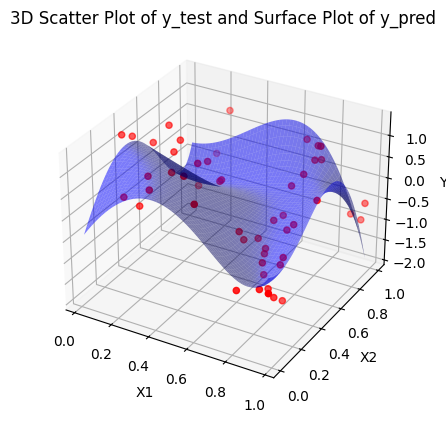

RMSE for the testing dataset (M=6): 0.5717451380047005
NMSE for the testing dataset (M=6): 0.4438245244090757
MAE for the testing dataset (M=6): 0.484399839949805
R^2 for the testing dataset (M=6): 0.5561754755909244


In [12]:
# M = 6

A = []
for k in range(400):
  v = []
  for i in range(7):
    for j in range(7):
      if(i + j <= 6):
        v.append((x11[k]**i)*(x12[k]**j))
      else:
        break
  A.append(v)

A = np.array(A)
print(f"Matrix A = {A}")

# Regression Calculation with lambda
lmbda = 0.01
A_t = np.transpose(A)
A_t_Al = A_t.dot(A) + lmbda*np.eye(28)
A_t_Al_inv = np.linalg.inv(A_t_Al)
A_t_Al_inv_A_t = A_t_Al_inv.dot(A_t)
u2 = A_t_Al_inv_A_t.dot(y1)

for i in range(len(u2)):
  print(f"beta_{i} = {u2[i]} ")

def prediction(x1,x2):
  y_pred = []
  for k in range(len(x1)):
    t = 0
    sum = 0
    for i in range(7):
      for j in range(7):
        if(i + j <= 6):
          sum += u2[t]*((x1[k]**i)*(x2[k]**j))
          t = t+1
        else:
          break
    y_pred.append(sum)
  return y_pred

y_pred = prediction(x21,x22)

# Step 1: Scatter plot for y_test data (testing points)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of actual y_test data (in red)
ax.scatter(x21, x22, y2, color='r', label='y_test (actual)')

# Step 2: Create a grid for x1, x2 to compute y_pred over a grid
x1_range = np.linspace(min(x21), max(x21), 100)
x2_range = np.linspace(min(x22), max(x22), 100)
x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)

# Step 3: Predict the surface using the prediction function
y_pred_mesh = np.zeros((x1_mesh.shape))

for i in range(x1_mesh.shape[0]):
    for j in range(x1_mesh.shape[1]):
        y_pred_mesh[i, j] = prediction([x1_mesh[i, j]], [x2_mesh[i, j]])[0]

# Step 4: Plot the surface of predicted values (y_pred)
ax.plot_surface(x1_mesh, x2_mesh, y_pred_mesh, color='b', alpha=0.5, label='y_pred (surface)')

# Set labels and title
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.title('3D Scatter Plot of y_test and Surface Plot of y_pred')

# Show plot with legend
plt.show()

# Metrics
print(f"RMSE for the testing dataset (M=6): {calculate_rmse(y2, y_pred)}")
print(f"NMSE for the testing dataset (M=6): {calculate_nmse(y2, y_pred)}")
print(f"MAE for the testing dataset (M=6): {calculate_mae(y2, y_pred)}")
print(f"R^2 for the testing dataset (M=6): {calculate_r2(y2, y_pred)}")

### Question 2
Consider the dataset 1. You will find the only one independent variable (Income in thousand dollars) and one target variable (Card Balance in hundred dollars). Train the polynomial regression model with M = 1, 2 and 5 using the gradient descent method and obtain the plots of predictions upon training set and test. Compare the predictions obtained by gradient descent method and direct method with in terms of RMSEs.

Degree: 1
Gradient Descent - RMSE (Train): 0.5947146505873595
Gradient Descent - RMSE (Test): 0.5625787334441796


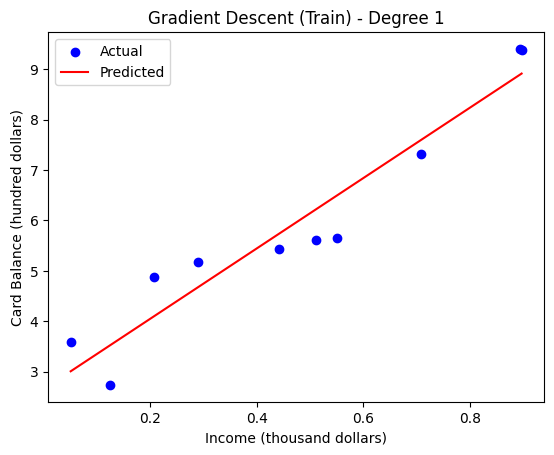

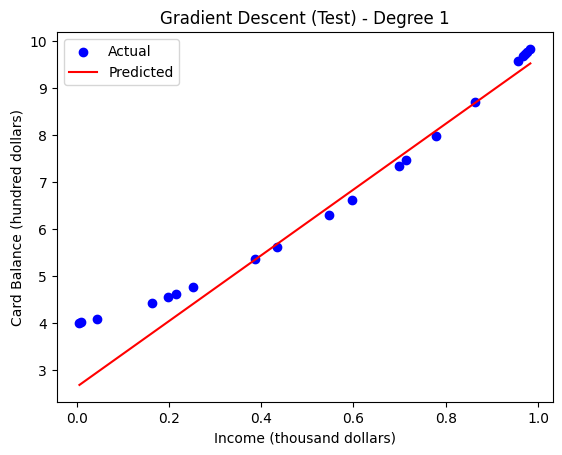

Direct Method - RMSE (Train): 0.5947146505834611
Direct Method - RMSE (Test): 0.5625799860234558


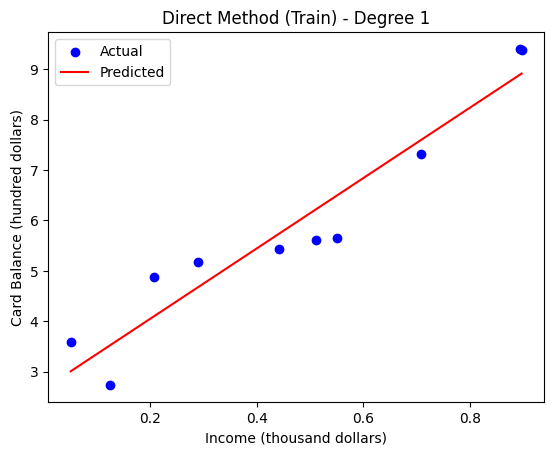

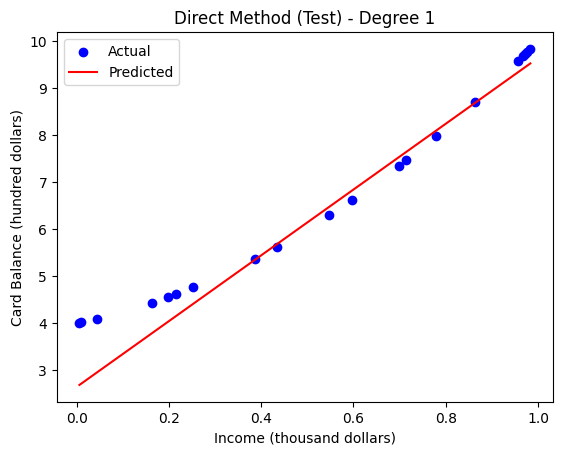



Degree: 2
Gradient Descent - RMSE (Train): 0.5011549712617378
Gradient Descent - RMSE (Test): 0.4136323856577067


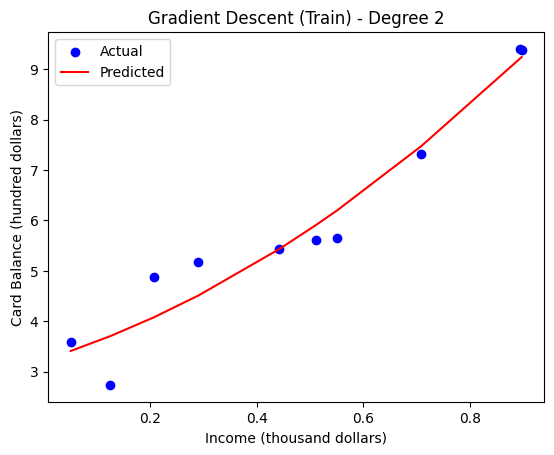

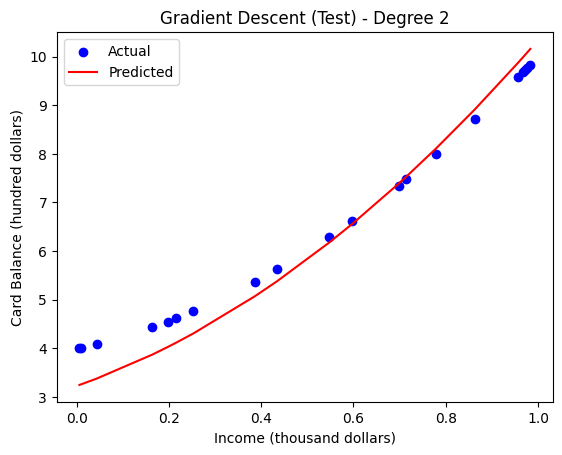

Direct Method - RMSE (Train): 0.49805750483495614
Direct Method - RMSE (Test): 0.4116989672523791


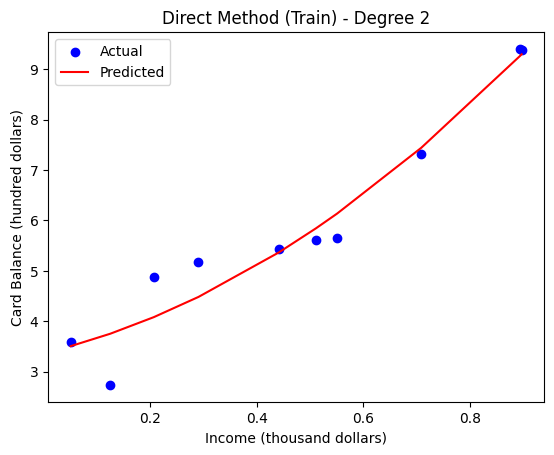

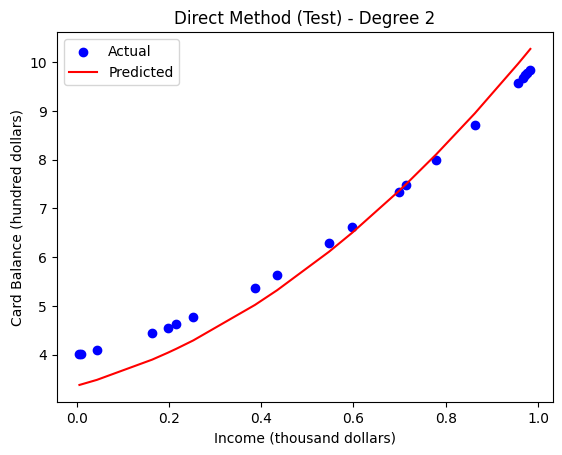



Degree: 5
Gradient Descent - RMSE (Train): 0.47725302885636073
Gradient Descent - RMSE (Test): 0.5143399409298736


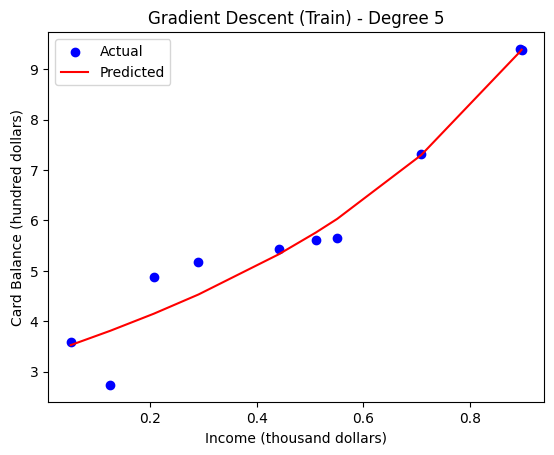

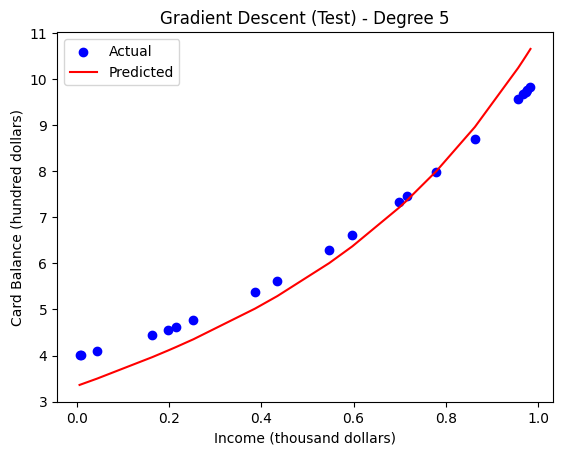

Direct Method - RMSE (Train): 0.2593767228699575
Direct Method - RMSE (Test): 2.577442141182683


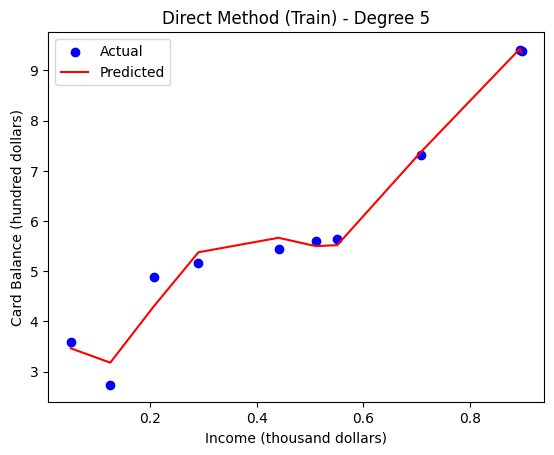

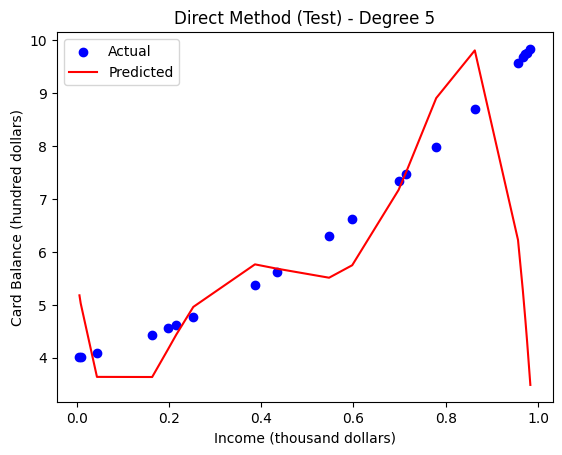

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Training dataset
df = pd.read_csv('train - train.csv')
x = df['Income'].values.reshape(-1, 1)  
y = df['Balance'].values

# Load Testing dataset
df = pd.read_csv('test - test.csv')
x_test = df['Income'].values.reshape(-1, 1)
y_test = df['Balance'].values

# Create polynomial features
def polynomial_features(x, degree):
    X_poly = np.ones((x.shape[0], degree + 1))
    for i in range(1, degree + 1):
        X_poly[:, i] = x[:, 0] ** i 
    return X_poly

# Gradient Descent method
def gradient_descent(x, y, degree, learning_rate=0.01, iterations=10000):
    X_poly = polynomial_features(x, degree)

    # Initialize coefficients (theta) with zeros
    theta = np.zeros(X_poly.shape[1])

    # Gradient descent loop
    m = len(y)
    for _ in range(iterations):
        predictions = X_poly.dot(theta)
        errors = predictions - y
        gradient = (2 / m) * X_poly.T.dot(errors)
        theta -= learning_rate * gradient

    return theta

# Direct method (closed-form solution)
def direct_method(x, y, degree):
    X_poly = polynomial_features(x, degree)
    theta = np.linalg.inv(X_poly.T.dot(X_poly)).dot(X_poly.T).dot(y)
    return theta

# Function to calculate RMSE
def calculate_rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# Function to plot predictions
def plot_predictions(x, y, y_pred, title):
    sorted_indices = np.argsort(x[:, 0])  
    x_sorted = x[sorted_indices]
    y_sorted = y_pred[sorted_indices]

    plt.scatter(x, y, color='blue', label='Actual')
    plt.plot(x_sorted, y_sorted, color='red', label='Predicted')
    plt.title(title)
    plt.xlabel('Income (thousand dollars)')
    plt.ylabel('Card Balance (hundred dollars)')
    plt.legend()
    plt.show()

# Loop through different polynomial degrees
degrees = [1, 2, 5]
for degree in degrees:
    print(f"Degree: {degree}")

    # Gradient Descent Method
    theta_gd = gradient_descent(x, y, degree)
    X_poly_train_gd = polynomial_features(x, degree)
    X_poly_test_gd = polynomial_features(x_test, degree)
    y_train_pred_gd = X_poly_train_gd.dot(theta_gd)
    y_test_pred_gd = X_poly_test_gd.dot(theta_gd)

    rmse_train_gd = calculate_rmse(y, y_train_pred_gd)
    rmse_test_gd = calculate_rmse(y_test, y_test_pred_gd)

    print(f"Gradient Descent - RMSE (Train): {rmse_train_gd}")
    print(f"Gradient Descent - RMSE (Test): {rmse_test_gd}")

    # Plot predictions for gradient descent
    plot_predictions(x, y, y_train_pred_gd, f"Gradient Descent (Train) - Degree {degree}")
    plot_predictions(x_test, y_test, y_test_pred_gd, f"Gradient Descent (Test) - Degree {degree}")

    # Direct Method
    theta_dm = direct_method(x, y, degree)
    X_poly_train_dm = polynomial_features(x, degree)
    X_poly_test_dm = polynomial_features(x_test, degree)
    y_train_pred_dm = X_poly_train_dm.dot(theta_dm)
    y_test_pred_dm = X_poly_test_dm.dot(theta_dm)

    rmse_train_dm = calculate_rmse(y, y_train_pred_dm)
    rmse_test_dm = calculate_rmse(y_test, y_test_pred_dm)

    print(f"Direct Method - RMSE (Train): {rmse_train_dm}")
    print(f"Direct Method - RMSE (Test): {rmse_test_dm}")

    # Plot predictions for direct method
    plot_predictions(x, y, y_train_pred_dm, f"Direct Method (Train) - Degree {degree}")
    plot_predictions(x_test, y_test, y_test_pred_dm, f"Direct Method (Test) - Degree {degree}")

    print("\n")


### Question 3:
Consider the motorcycle dataset. Estimate a regularized least square
regression model (Also called Ridge Regression model) with Gaussian basis
functions. Obtain the plot of estimated functions along with data points.
Also obtain the RMSE, MAE, NMSE and R^2 for evaluating the quality of fit.

RMSE: 20.21
MAE: 14.19
NMSE: 0.18
R^2: 0.82


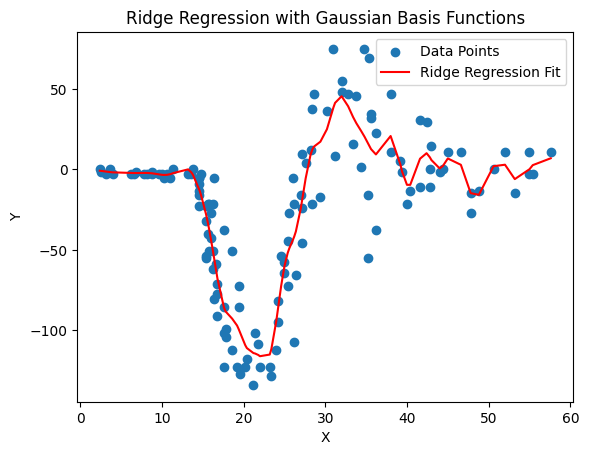

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV
data = pd.read_csv('motorcycle.csv')
X = data['x'].values.reshape(-1, 1)
y = data['y'].values

# Gaussian basis function transformation
def gaussian_basis(x, center, width):
    return np.exp(-((x - center) ** 2) / (2 * width ** 2))

centers = np.linspace(X.min(), X.max(), 100)
width = 1.0
X_transformed = np.hstack([gaussian_basis(X, c, width) for c in centers])

# Ridge Regression
def ridge_regression(X, y, alpha):
    I = np.eye(X.shape[1])
    return np.linalg.inv(X.T.dot(X) + alpha * I).dot(X.T).dot(y)

alpha = 1.0  # Regularization strength
w_ridge = ridge_regression(X_transformed, y, alpha)

# Step 4: Make predictions
y_pred = X_transformed.dot(w_ridge)

# Step 5: Compute evaluation metrics manually
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def nmse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2) / np.var(y_true)

def r_squared(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

# Calculate metrics
rmse_value = rmse(y, y_pred)
mae_value = mae(y, y_pred)
nmse_value = nmse(y, y_pred)
r2_value = r_squared(y, y_pred)

print(f"RMSE: {rmse_value:.2f}")
print(f"MAE: {mae_value:.2f}")
print(f"NMSE: {nmse_value:.2f}")
print(f"R^2: {r2_value:.2f}")

# Step 6: Plot the results
plt.scatter(X, y, label='Data Points')
plt.plot(X, y_pred, color='red', label='Ridge Regression Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Ridge Regression with Gaussian Basis Functions')
plt.legend()
plt.show()